In [1]:
import sys
import numpy as np
import pandas as pd
import imageio as iio
import matplotlib.pyplot as plt

In [2]:
path = "/dhc/groups/fglippert/MorphoMNIST/mnist_thickness_slant/trainset/"
labels = pd.read_json(path + "dataset.json")

In [184]:
labels.head()

,labels
0,"[00000/img00000000.png, {'thickness': 2.318287..."
1,"[00000/img00000001.png, {'thickness': 1.741932..."
2,"[00000/img00000002.png, {'thickness': 1.097795..."
3,"[00000/img00000003.png, {'thickness': 1.706288..."
4,"[00000/img00000004.png, {'thickness': 2.110856..."


In [165]:
labels = labels["labels"]

In [166]:
labels[0]

['00000/img00000000.png',
 {'thickness': 2.3182874, 'slant': -4.9231415, 'label': 1.0}]

In [167]:
labels.view()

0        [00000/img00000000.png, {'thickness': 2.318287...
1        [00000/img00000001.png, {'thickness': 1.741932...
2        [00000/img00000002.png, {'thickness': 1.097795...
3        [00000/img00000003.png, {'thickness': 1.706288...
4        [00000/img00000004.png, {'thickness': 2.110856...
                               ...                        
53995    [00053/img00053995.png, {'thickness': 2.413601...
53996    [00053/img00053996.png, {'thickness': 2.515668...
53997    [00053/img00053997.png, {'thickness': 1.269226...
53998    [00053/img00053998.png, {'thickness': 1.289402...
53999    [00053/img00053999.png, {'thickness': 2.218622...
Name: labels, Length: 54000, dtype: object

In [168]:
all_labels = pd.DataFrame(columns=["img"] + list(labels[0][1].keys()))
for i in range(10000):
    single = []
    single.append(labels[5000 + i][0])
    for key in labels[5000 + i][1].keys():
        single.append(labels[5000 + i][1][key])
    all_labels.loc[i] = single

In [169]:
all_labels.head()

,img,thickness,slant,label
0,00005/img00005000.png,2.089288,-8.498535,3.0
1,00005/img00005001.png,1.376286,-23.346119,2.0
2,00005/img00005002.png,1.570175,-16.673544,5.0
3,00005/img00005003.png,1.764702,-13.200317,0.0
4,00005/img00005004.png,1.128856,-28.013315,7.0


In [170]:
### take only one class (e.g. 2)
labels = all_labels[all_labels["label"] == 5]
### sort by slant
labels = labels.sort_values(by=["thickness"])

In [171]:
labels.iloc[500:560]

,img,thickness,slant,label
4867,00009/img00009867.png,2.035215,-10.682846,5.0
3079,00008/img00008079.png,2.036621,-10.433465,5.0
4744,00009/img00009744.png,2.038483,-9.097104,5.0
7422,00012/img00012422.png,2.039117,-7.741674,5.0
2509,00007/img00007509.png,2.039626,-10.811460,5.0
3834,00008/img00008834.png,2.044868,-8.181248,5.0
2717,00007/img00007717.png,2.050264,-8.384533,5.0
7284,00012/img00012284.png,2.051529,-8.693778,5.0
6881,00011/img00011881.png,2.051619,-6.949207,5.0
2426,00007/img00007426.png,2.062709,-9.403797,5.0


In [172]:
labels.describe()

,thickness,slant,label
count,887.000000,887.000000,887.0
mean,2.002516,-9.984196,5.0
std,0.638039,12.829474,0.0
min,0.537941,-38.466120,5.0
25%,1.553085,-19.105190,5.0
50%,1.927844,-11.643002,5.0
75%,2.392168,-2.146940,5.0
max,4.677262,43.639946,5.0


In [173]:
ll = labels.iloc[::4]

In [174]:
ll.describe()

,thickness,slant,label
count,222.000000,222.000000,222.0
mean,1.998394,-9.979043,5.0
std,0.638476,12.866469,0.0
min,0.537941,-36.657917,5.0
25%,1.553099,-18.849373,5.0
50%,1.922905,-11.132686,5.0
75%,2.387367,-1.585661,5.0
max,4.211812,34.941680,5.0


In [175]:
ll = ll.sort_values(by=["thickness"])

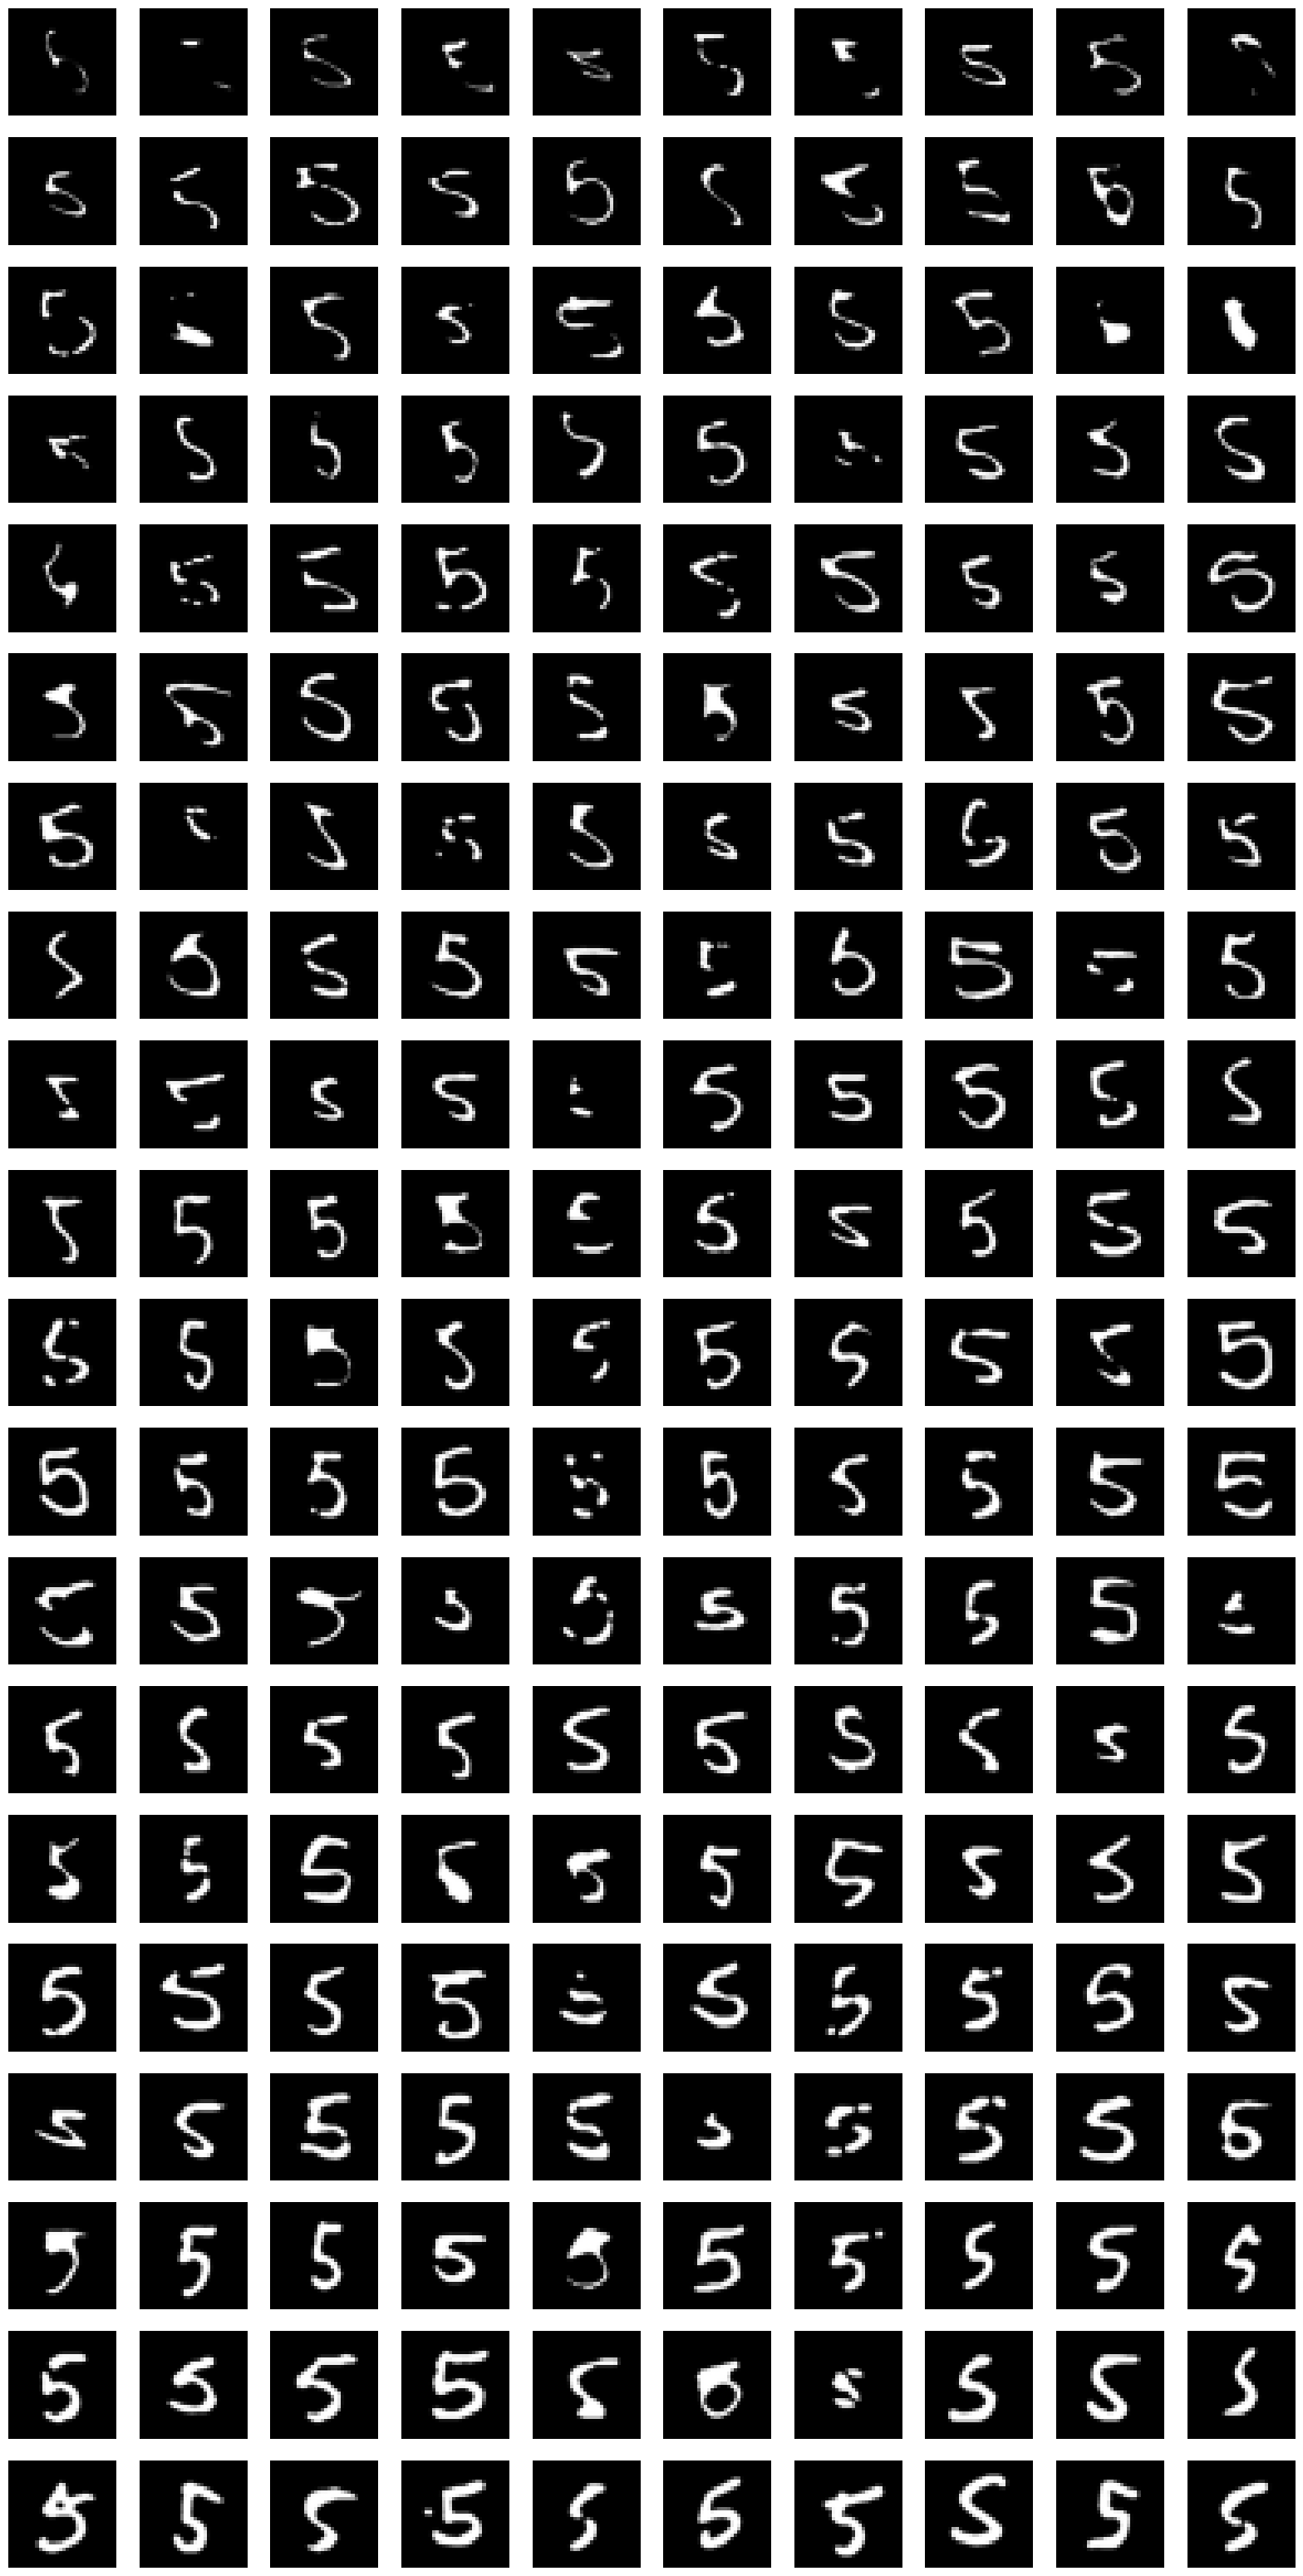

In [176]:
ncols = 10
nrows = 20
plt.figure(figsize=(ncols * 2, nrows * 2))
for i in range(nrows):
    for j in range(ncols):
        img_path = path + ll.iloc[i * ncols + j]["img"]
        img = iio.imread(img_path)
        plt.subplot(nrows, ncols, i * ncols + j + 1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")

In [177]:
ll_slant = np.deg2rad(ll["slant"].values)

In [178]:
ll_slant

array([-0.63980135, -0.63569701, -0.59217058, -0.55727878, -0.57304657,
       -0.55890651, -0.54829531, -0.48676659, -0.53362461, -0.5058527 ,
       -0.51125371, -0.47808329, -0.50305941, -0.49120714, -0.44558361,
       -0.4830279 , -0.47553717, -0.46135082, -0.43330446, -0.46981185,
       -0.44237496, -0.43843758, -0.46198797, -0.42293119, -0.44978627,
       -0.42721632, -0.42009742, -0.44508078, -0.38687188, -0.38150768,
       -0.39379728, -0.41719516, -0.38434506, -0.37822257, -0.4067804 ,
       -0.40009893, -0.37212148, -0.372659  , -0.36973261, -0.38604344,
       -0.36510736, -0.3826551 , -0.38918547, -0.34809866, -0.38644914,
       -0.36242526, -0.37715651, -0.36672024, -0.3590984 , -0.33829692,
       -0.34887268, -0.37156311, -0.31990307, -0.35569327, -0.32293434,
       -0.30529313, -0.32946036, -0.34449759, -0.32755338, -0.31737017,
       -0.31792059, -0.32408354, -0.30471679, -0.32468304, -0.32653061,
       -0.29171555, -0.33160053, -0.28682114, -0.31394461, -0.31

In [179]:
ll["slant"].values

array([-36.657917  , -36.422756  , -33.928875  , -31.929722  ,
       -32.83315   , -32.022984  , -31.415007  , -27.889671  ,
       -30.574438  , -28.983225  , -29.29268   , -27.392155  ,
       -28.823181  , -28.144096  , -25.53006   , -27.67546   ,
       -27.246273  , -26.433455  , -24.826517  , -26.918236  ,
       -25.346218  , -25.120623  , -26.469961  , -24.232172  ,
       -25.770855  , -24.477692  , -24.069809  , -25.50125   ,
       -22.166126  , -21.85878   , -22.562922  , -23.903522  ,
       -22.02135   , -21.670557  , -23.3068    , -22.92398   ,
       -21.32099   , -21.351788  , -21.184118  , -22.11866   ,
       -20.919111  , -21.924522  , -22.298685  , -19.944584  ,
       -22.141905  , -20.765438  , -21.609476  , -21.011522  ,
       -20.574823  , -19.382986  , -19.988932  , -21.288998  ,
       -18.329096  , -20.379723  , -18.502775  , -17.492008  ,
       -18.876688  , -19.738258  , -18.767426  , -18.183971  ,
       -18.215508  , -18.568619  , -17.458986  , -18.60

In [6]:
sys.path.append("/dhc/home/wei-cheng.lai/projects/causal_gans/stylegan3/")
from metrics import metric_main
from morphoswithmnist.morphomnist import io, measure
from morphoswithmnist.morphomnist.morpho import ImageMorphology, ImageMoments

image_path = "/dhc/home/wei-cheng.lai/data/MNIST/raw/t10k-images-idx3-ubyte.gz"
images = io.load_idx(image_path)

In [20]:
deg = []
rad = []
for i in np.arange(-180, 190, 10):
    deg.append(i)
    rad.append(np.deg2rad(i))

In [29]:
angle = np.arctan(deg)
print(angle)
print(np.arctan(rad))

[-1.56524083 -1.56491404 -1.56454641 -1.56412976 -1.56365359 -1.56310417
 -1.56246319 -1.56170567 -1.56079666 -1.55968567 -1.55829698 -1.55651158
 -1.5541312  -1.55079899 -1.54580153 -1.53747533 -1.52083793 -1.47112767
  0.          1.47112767  1.52083793  1.53747533  1.54580153  1.55079899
  1.5541312   1.55651158  1.55829698  1.55968567  1.56079666  1.56170567
  1.56246319  1.56310417  1.56365359  1.56412976  1.56454641  1.56491404
  1.56524083]
[-1.26262726 -1.24571888 -1.226925   -1.20592739 -1.18233656 -1.15567236
 -1.12533883 -1.09059189 -1.05049817 -1.00388482 -0.94928224 -0.88486958
 -0.80844879 -0.71750578 -0.60947097 -0.48234791 -0.33584237 -0.17279243
  0.          0.17279243  0.33584237  0.48234791  0.60947097  0.71750578
  0.80844879  0.88486958  0.94928224  1.00388482  1.05049817  1.09059189
  1.12533883  1.15567236  1.18233656  1.20592739  1.226925    1.24571888
  1.26262726]


In [23]:
tans = -np.tan(rad)

In [24]:
tans

array([-1.22464680e-16, -1.76326981e-01, -3.63970234e-01, -5.77350269e-01,
       -8.39099631e-01, -1.19175359e+00, -1.73205081e+00, -2.74747742e+00,
       -5.67128182e+00,  1.63312394e+16,  5.67128182e+00,  2.74747742e+00,
        1.73205081e+00,  1.19175359e+00,  8.39099631e-01,  5.77350269e-01,
        3.63970234e-01,  1.76326981e-01, -0.00000000e+00, -1.76326981e-01,
       -3.63970234e-01, -5.77350269e-01, -8.39099631e-01, -1.19175359e+00,
       -1.73205081e+00, -2.74747742e+00, -5.67128182e+00, -1.63312394e+16,
        5.67128182e+00,  2.74747742e+00,  1.73205081e+00,  1.19175359e+00,
        8.39099631e-01,  5.77350269e-01,  3.63970234e-01,  1.76326981e-01,
        1.22464680e-16])

0 before:
Area: 71.1
Length: 34.3
Thickness: 2.15
Slant: 4°
Dimensions: 15.1 x 19.6
0 after:
Area: 60.4
Length: 45.9
Thickness: 1.52
Slant: 52°
Dimensions: 14.8 x 17.0


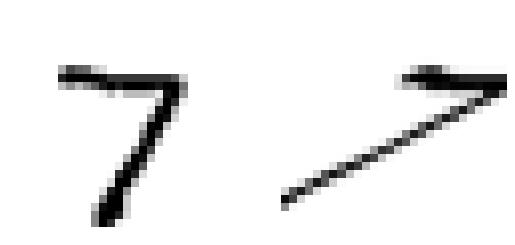


1 before:
Area: 112.8
Length: 46.0
Thickness: 2.57
Slant: -10°
Dimensions: 17.6 x 19.9
1 after:
Area: 89.8
Length: 59.7
Thickness: 1.78
Slant: 52°
Dimensions: 17.1 x 18.7


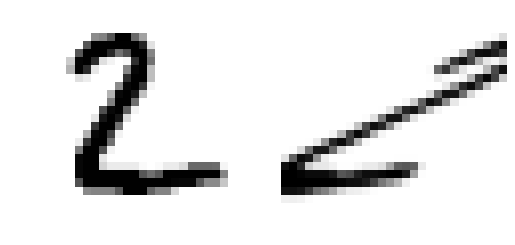


2 before:
Area: 39.1
Length: 23.4
Thickness: 1.83
Slant: 17°
Dimensions: 3.7 x 19.7
2 after:
Area: 43.2
Length: 35.6
Thickness: 1.35
Slant: 56°
Dimensions: 5.1 x 18.3


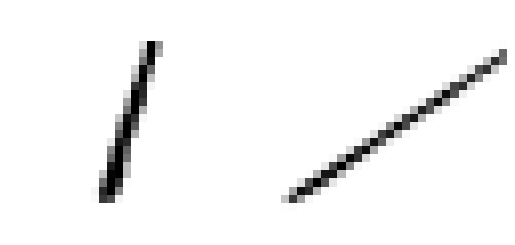


3 before:
Area: 146.9
Length: 45.1
Thickness: 3.49
Slant: 4°
Dimensions: 14.7 x 19.0
3 after:
Area: 139.3
Length: 65.9
Thickness: 2.55
Slant: 55°
Dimensions: 15.5 x 17.8


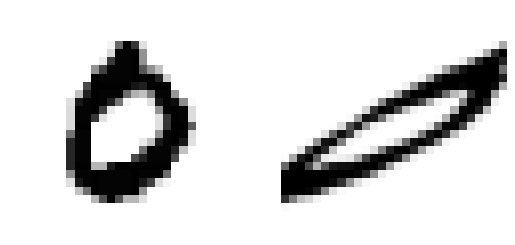


4 before:
Area: 75.1
Length: 43.1
Thickness: 1.96
Slant: -7°
Dimensions: 15.0 x 18.8
4 after:
Area: 64.2
Length: 61.1
Thickness: 1.25
Slant: 51°
Dimensions: 15.8 x 18.5


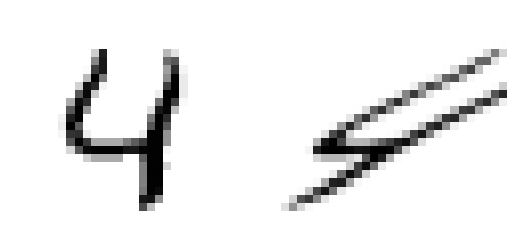


5 before:
Area: 53.8
Length: 23.3
Thickness: 2.51
Slant: 17°
Dimensions: 4.5 x 19.3
5 after:
Area: 54.9
Length: 33.0
Thickness: 1.76
Slant: 56°
Dimensions: 5.6 x 18.7


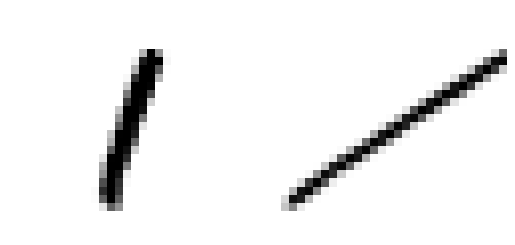


6 before:
Area: 83.1
Length: 43.4
Thickness: 2.09
Slant: -5°
Dimensions: 16.7 x 19.1
6 after:
Area: 71.1
Length: 58.6
Thickness: 1.44
Slant: 51°
Dimensions: 15.2 x 18.4


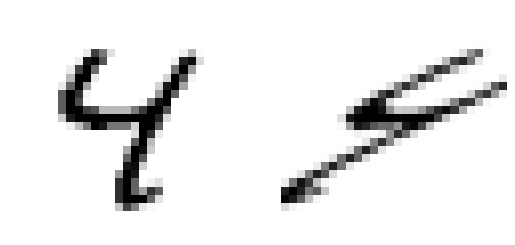


7 before:
Area: 83.1
Length: 39.3
Thickness: 2.41
Slant: -29°
Dimensions: 10.9 x 18.8
7 after:
Area: 80.3
Length: 59.5
Thickness: 1.62
Slant: 55°
Dimensions: 11.7 x 17.7


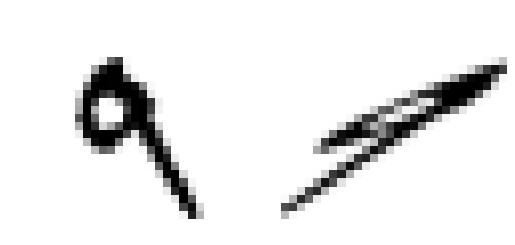


8 before:
Area: 121.1
Length: 40.4
Thickness: 3.13
Slant: 15°
Dimensions: 17.3 x 18.5
8 after:
Area: 100.1
Length: 41.6
Thickness: 2.85
Slant: 48°
Dimensions: 15.1 x 17.5


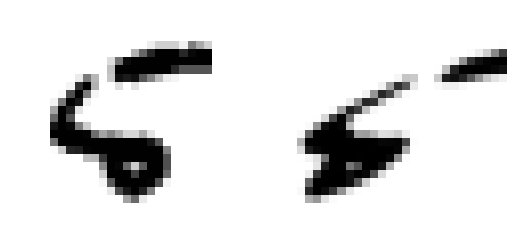


9 before:
Area: 125.2
Length: 51.8
Thickness: 2.78
Slant: 17°
Dimensions: 15.2 x 19.0
9 after:
Area: 118.6
Length: 57.7
Thickness: 2.41
Slant: 54°
Dimensions: 15.7 x 16.8


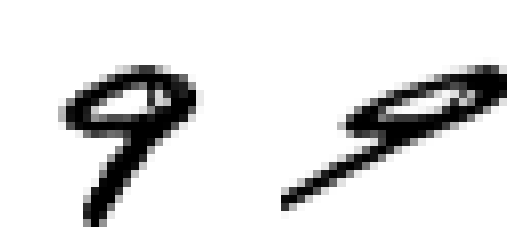


10 before:
Area: 118.2
Length: 54.1
Thickness: 2.37
Slant: 7°
Dimensions: 16.1 x 19.6
10 after:
Area: 92.8
Length: 69.6
Thickness: 1.56
Slant: 51°
Dimensions: 17.5 x 19.0


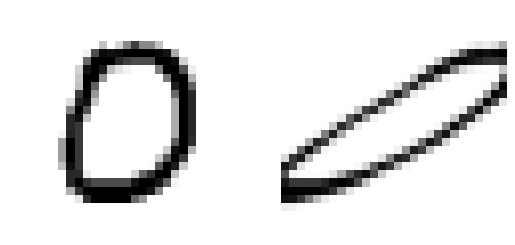


11 before:
Area: 110.6
Length: 57.0
Thickness: 2.07
Slant: -2°
Dimensions: 16.2 x 19.4
11 after:
Area: 101.1
Length: 88.7
Thickness: 1.34
Slant: 55°
Dimensions: 17.2 x 18.3


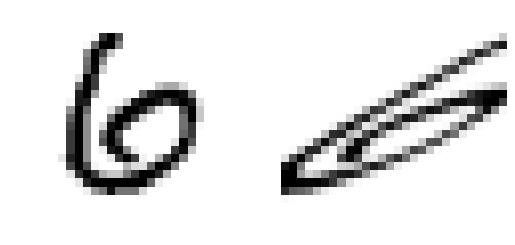


12 before:
Area: 90.2
Length: 43.0
Thickness: 2.28
Slant: 4°
Dimensions: 12.5 x 19.4
12 after:
Area: 86.7
Length: 63.7
Thickness: 1.68
Slant: 55°
Dimensions: 12.9 x 17.6


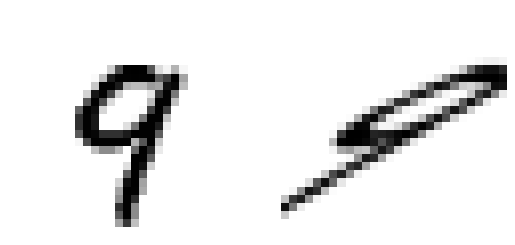


13 before:
Area: 116.2
Length: 51.0
Thickness: 2.48
Slant: 2°
Dimensions: 14.9 x 19.5
13 after:
Area: 102.9
Length: 70.9
Thickness: 1.72
Slant: 53°
Dimensions: 15.9 x 18.8


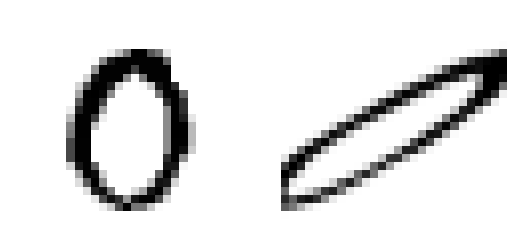


14 before:
Area: 63.1
Length: 21.0
Thickness: 3.07
Slant: 2°
Dimensions: 5.2 x 19.5
14 after:
Area: 60.4
Length: 34.8
Thickness: 1.87
Slant: 55°
Dimensions: 6.0 x 18.3


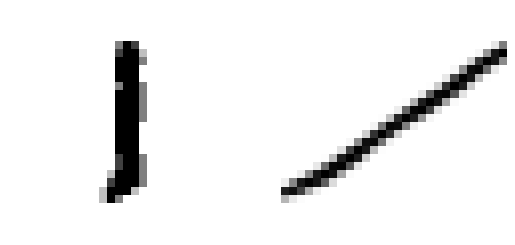

In [41]:
from morphoswithmnist.morphomnist.transforms import SetThickness, SetSlant
pert = SetSlant(np.deg2rad(56))
for n in range(15):
    print(n, "before:")
    measure.measure_image(images[n], verbose=True)

    morph = ImageMorphology(images[n], scale=16)
    pert_hires_image = pert(morph)
    pert_image = morph.downscale(pert_hires_image)

    print(n, "after:")
    measure.measure_image(pert_image, verbose=True)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(images[n], cmap='gray_r')
    ax2.imshow(pert_image, cmap='gray_r')
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    print()